Отримати досвід проведення EDA (explorary data analysis) та роботи з базовими моделями і функціями пакету scikit-learn.

Частина 1. EDA

Знайти і вибрати датасет для роботи з ним. Зазначити такі відомості про датасет: **імʼя і контакти автора**; **посилання на джерело**; **опис датасету і наявних колонок в ньому**.

Зробити EDA: **визначити features з датасету, з якими будете працювати**; **описати їх значимість і чому ви їх вибрали**; заповнити **пропущені або невідповідні значення**, якщо такі є; побудувати **необхідні для аналізу графіки**; **побудувати інші графіки із закономірностями даних**.
Зробити **нормалізацію або стандартизацію значень**; перевірити розподіл значень targets (таргету вашої моделі).

Частина 2. Тренування
Визначити **одну або декілька моделей для тренування**.
Розділити датасет на **тренувальні та тестові дані**.
Перевірити **помилку моделі із значеннями гіперпараметрів за замовчуванням**.
Побудувати **графік залежності значення помилки та різними значеннями одного/двох гіперпараметрів**. **Продемонструвати при яких значеннях відбувається overfit моделі, а при яких - underfit**.
Застосувати **GridSearch або інший алгоритм для пошуку найкращих значень гіперпараметрів моделі**.
Частина 3. Зробити висновки щодо проведеного EDA та тренування моделей



Ваші роботи необхідно завантажити або у вигляді посилання на Git-репозиторій або .ipynb/.py файлом.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
dataset = pd.read_csv('data.csv')

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


for the features:
1. radius
2. texture
3. perimeter
4. area
5. smoothness
6. compactness
7. concativity
8. concave points
9. symmetry
10. fractal dimension

**were collected three values: the mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features**

Diagnosis (M = malignant, B = benign)

In [88]:
dataset.shape

(569, 33)

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [90]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**let's see correlation with a heatmap between each two groups of 3 sets of features**

<Axes: >

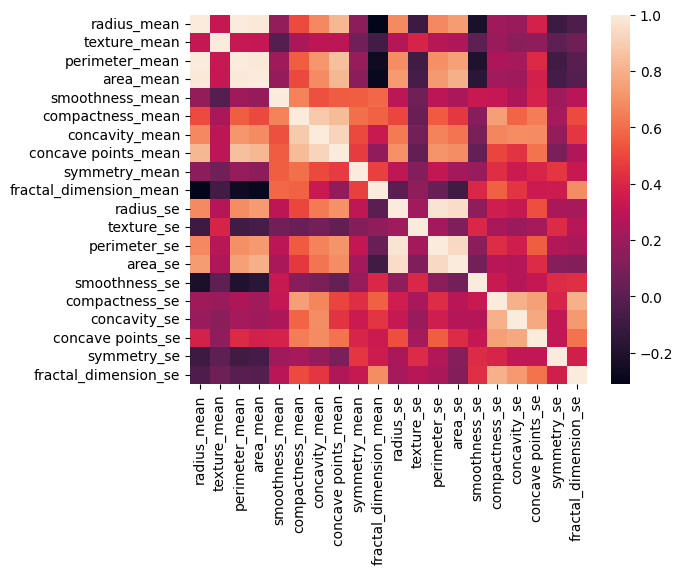

In [91]:
sns.heatmap(dataset.iloc[:, 2:22].corr())

in this heatmap we compare correlation between mean values

<Axes: >

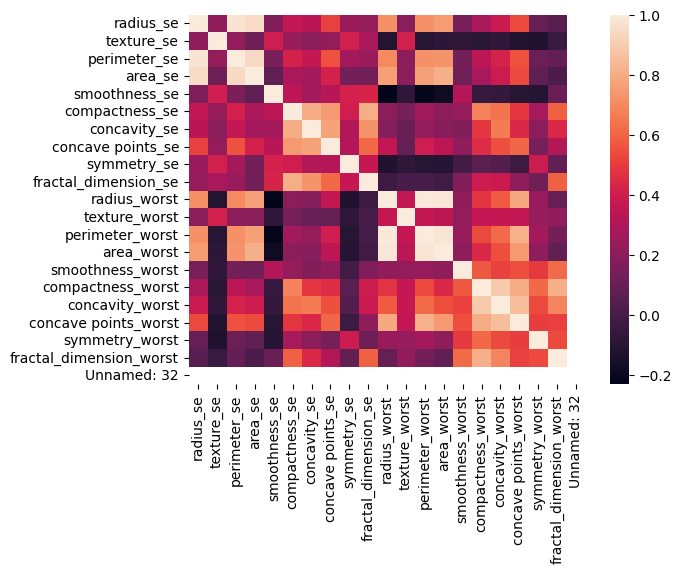

In [92]:
sns.heatmap(dataset.iloc[:, 12:].corr())

<Axes: >

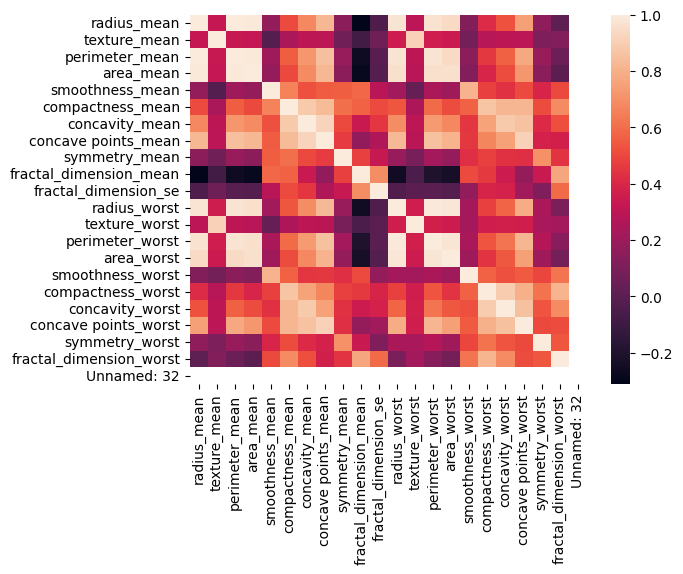

In [93]:
sns.heatmap(pd.concat((dataset.iloc[:, 2:12], dataset.iloc[:, 21:]), axis=1).corr())

**we can see same correlation between each two sets, so let's try to leave just one set of features, mean values, as  columns and look for correlation between them**

<Axes: >

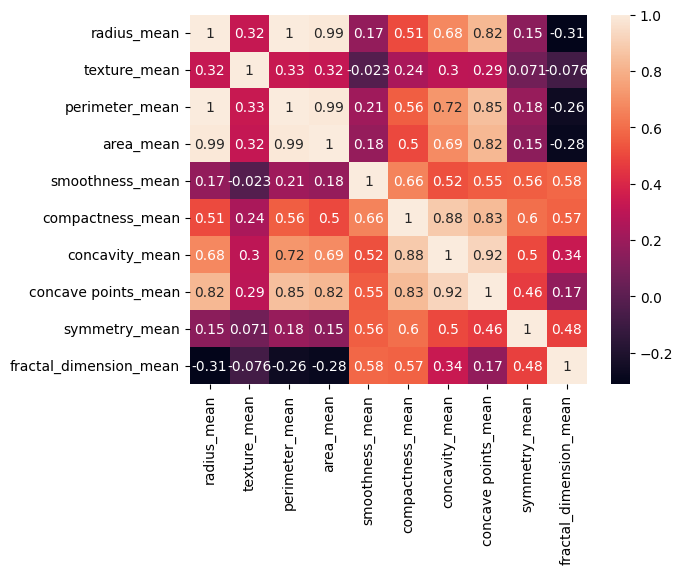

In [94]:
sns.heatmap(dataset.iloc[:, 2:12].corr(), annot=True)

**we can see that radius, perimeter and area are highly correlated, so we will leave only radius. as well as we see correlation between smoothness and symmetry, so we will take only smoothness. other features are different, so we will leave and plot them**

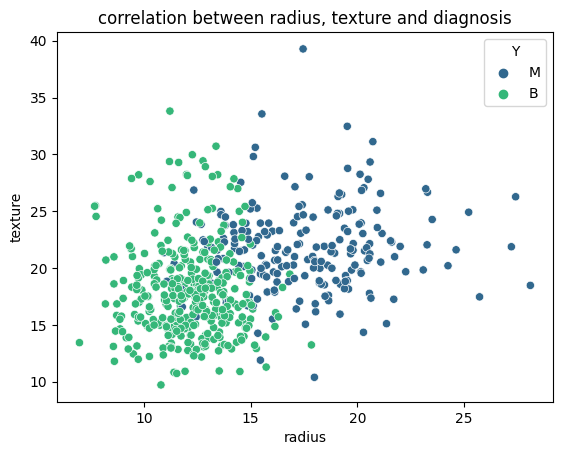

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

X1 = dataset.iloc[:, 2]
X2 = dataset.iloc[:, 3]
Y = dataset.iloc[:, 1]

data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

sns.scatterplot(x='X1', y='X2', hue='Y', data=data, palette='viridis')

plt.xlabel('radius')
plt.ylabel('texture')
plt.title('correlation between radius, texture and diagnosis')

plt.show()

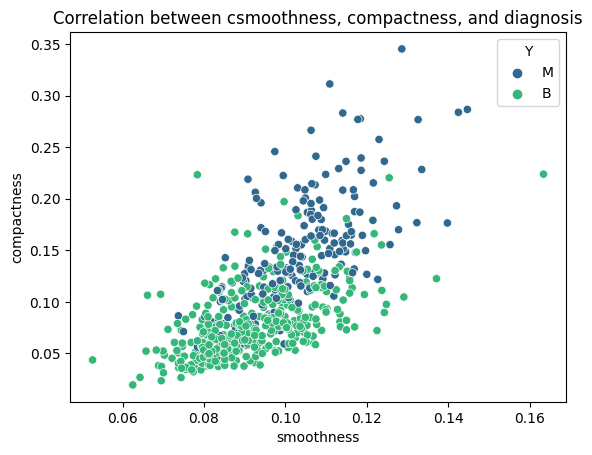

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

X1 = dataset.iloc[:, 6]
X2 = dataset.iloc[:, 7]
Y = dataset.iloc[:, 1]

data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

sns.scatterplot(x='X1', y='X2', hue='Y', data=data, palette='viridis')

plt.xlabel('smoothness')
plt.ylabel('compactness')
plt.title('Correlation between csmoothness, compactness, and diagnosis')

plt.show()

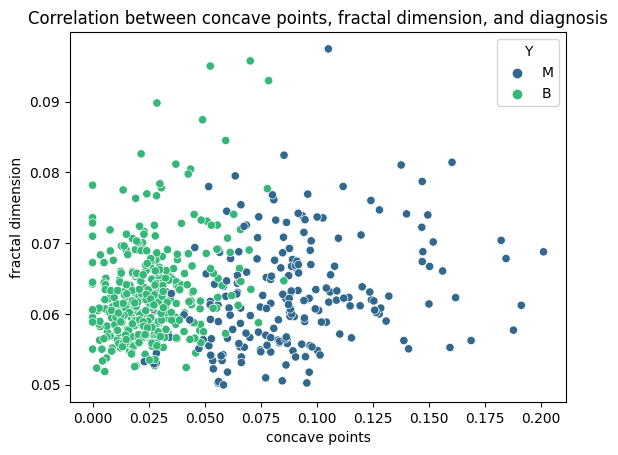

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

X1 = dataset.iloc[:, 9]
X2 = dataset.iloc[:, 11]
Y = dataset.iloc[:, 1]

data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

sns.scatterplot(x='X1', y='X2', hue='Y', data=data, palette='viridis')

plt.xlabel('concave points')
plt.ylabel('fractal dimension')
plt.title('Correlation between concave points, fractal dimension, and diagnosis')

plt.show()

**in each scatterplot we see pattern in data for malignant and benign to be mostly separated. Hypothesisif that if we combine all 7 selected features we will be able to better separate them**

In [98]:
columns_to_keep = [
    'radius_mean',
    'texture_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'fractal_dimension_mean'
]

X = dataset[columns_to_keep].values
y = dataset.iloc[:, 1].values

In [99]:
print(X)

[[17.99    10.38     0.1184  ...  0.3001   0.1471   0.07871]
 [20.57    17.77     0.08474 ...  0.0869   0.07017  0.05667]
 [19.69    21.25     0.1096  ...  0.1974   0.1279   0.05999]
 ...
 [16.6     28.08     0.08455 ...  0.09251  0.05302  0.05648]
 [20.6     29.33     0.1178  ...  0.3514   0.152    0.07016]
 [ 7.76    24.54     0.05263 ...  0.       0.       0.05884]]


In [100]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

**dividing data for train and test sets**

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

applying standartization

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
print(X_train)

[[-0.65079907 -0.43057322 -0.91381897 ... -0.78763077 -0.67944444
  -0.79877182]
 [-0.82835341  0.15226547  0.65281216 ... -1.06654609 -1.07190884
  -0.34145374]
 [ 1.68277234  2.18977235  0.10362413 ...  0.70576603  1.25773115
  -1.06468841]
 ...
 [-1.33114223 -0.22172269  0.32763504 ... -0.78482555 -0.90485937
   1.01881186]
 [-1.25110186 -0.24600763 -1.94137868 ... -1.13037758 -1.26748337
   0.27073883]
 [-0.74662205  1.14066273 -0.27141349 ...  0.28753332 -0.20875539
   0.45045169]]


**train knn model with default hyperparameters**

In [104]:
from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [105]:
y_pred = classifier.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[84,  6],
       [ 5, 48]])

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9230769230769231

**train support vector machine with default hyperparameters**

In [108]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [109]:
y_pred = classifier.predict(X_test)

In [111]:
confusion_matrix(y_test, y_pred)

array([[86,  4],
       [ 5, 48]])

In [112]:
accuracy_score(y_test, y_pred)

0.9370629370629371

**selecting the best number of neighbours for KNN by changing the hyperparameter**

In [113]:
k_values = list(range(1,20))
accuracy_list = []

In [114]:
for k in k_values:
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

<Axes: >

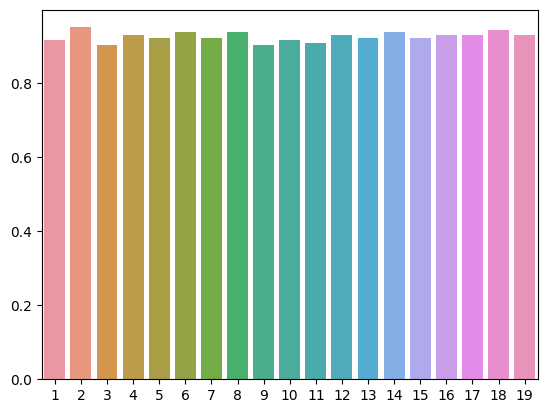

In [115]:
sns.barplot(data = { 'k_values': k_values, 'accuracy': accuracy_list }, x = 'k_values', y = 'accuracy')

In [116]:
max(accuracy_list)

0.951048951048951

**same for SVM**

In [117]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_list = []

In [118]:
for ker in kernels:
    n = SVC(kernel=ker)
    n.fit(X_train, y_train)
    y_pred = n.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

<Axes: >

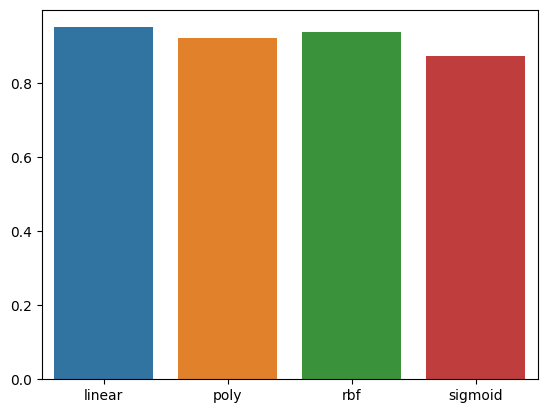

In [119]:
sns.barplot(data = { 'kernels': kernels, 'accuracy': accuracy_list }, x = 'kernels', y = 'accuracy')

In [120]:
accuracy_list

[0.951048951048951, 0.9230769230769231, 0.9370629370629371, 0.8741258741258742]

**GridSearch on K-Nearest Neighbours**

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {
    'n_neighbors': list(range(1,20)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2]
}

In [123]:
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [124]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 16, 'p': 2, 'weights': 'distance'}
Best score:  0.9483994528043775


Conclusion:
1. it is important to get acquainted with the data before applying it
2. selecting valuable features can reduce computational costs and make data easier to analyze. it will also reduce noise that can impact on accuracy
3. selecting proper hyperparameters can increase the accuracy of the model
4. GridSearch makes it easier to select proper hyperparameters.